# Introduction a Pandas et Matplotlib

In [119]:
import os
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt
import datetime 
import numpy as np
%matplotlib notebook

## Question 1 

### Chargement des donnees 

In [120]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(os.path.isfile('zipfilename')):
    urllib.request.urlretrieve(Location, zipfilename)
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', ''] 
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000, na_values=na_values, usecols=fields)

### Nombre de lignes manquantes

In [121]:
print("Le nombre de lignes ayant des valeurs manquantes est de: ",df['Global_active_power'].isnull().sum())

Le nombre de lignes ayant des valeurs manquantes est de:  3732


## Question 2

### Supprimer toutes les lignes ayant des valeurs manquantes 

In [122]:
#df.shape retourne le tuple representant la dimension de la dataframe df
print("Le nombre de lignes de la dataframe df avant d'eliminer les valeurs nulles est de: ", df.shape[0]) 
df=df.dropna(axis=0)
print("Le nombre de lignes de la dataframe df apres elimination des valeurs nulles est de: ", df.shape[0])
#Et pour s'assurer:
print("Le nombre de lignes ayant des valeurs manquantes est de: ",df['Global_active_power'].isnull().sum())

Le nombre de lignes de la dataframe df avant d'eliminer les valeurs nulles est de:  200000
Le nombre de lignes de la dataframe df apres elimination des valeurs nulles est de:  196268
Le nombre de lignes ayant des valeurs manquantes est de:  0


## Question 3 

### Creer une Time Series 

In [123]:
#Modification de la colonne date pour que ca corresponde a la colonne DateTime
df['Date']=pd.to_datetime(df['Date'] + ' ' + df['Time'])

#Elimination de la colonne Time et renommage de la colonne Date en DateTime
del df['Time']
df=df.rename(columns={'Date':'DateTime'})

In [124]:
df.head() #retourne les 5 premieres lignes de df
          #Pour s'assurer de la structure de df

,DateTime,Global_active_power
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666


In [125]:
#Changer l'index de la dataframe df
df = df.set_index(['DateTime'])
print(df.head())

                     Global_active_power
DateTime                                
2006-12-16 17:24:00                4.216
2006-12-16 17:25:00                5.360
2006-12-16 17:26:00                5.374
2006-12-16 17:27:00                5.388
2006-12-16 17:28:00                3.666


## Question 4

### Graphique des moyennes journalieres 

<IPython.core.display.Javascript object>


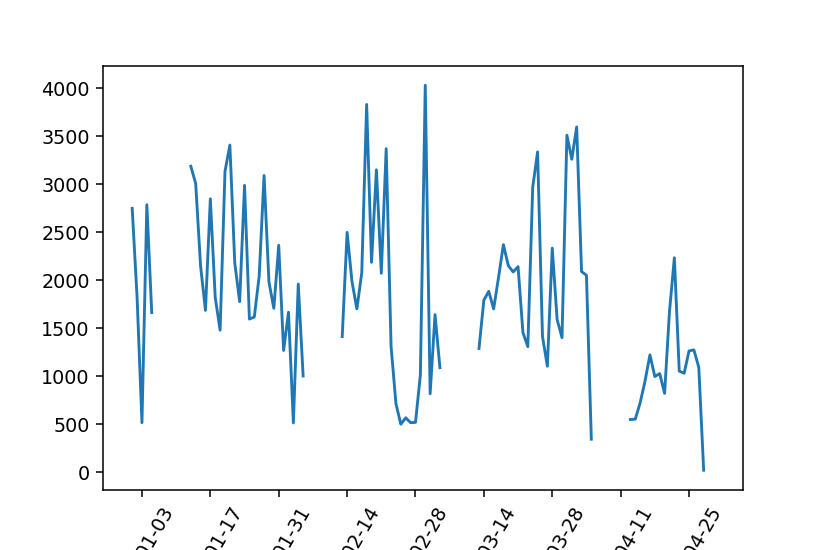

In [126]:
fig=plt.figure(figsize=(6,4))

#Prendre les donnees entre le 1 Janvier et le 30 Avril
dayini='2007-01-01'
dayend='2007-04-30'
df_trim=df[dayini:dayend]

#Faire la somme de tous les "Global_active_power" d'un jour donne
day_trim=df_trim.groupby(pd.TimeGrouper(freq='1D')).sum()
plt.plot(day_trim['Global_active_power'])
plt.xticks(rotation=60)
plt.show()

#Une autre facon de faire
#-------------------------------
#df_trim=df['2007-01-01':'2007-04-30']
#day_trim=df_trim.resample('D')['Global_active_power'].sum()
#-------------------------------

## Question 5 

### Chargement et traitement des donnees

In [127]:
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'TG_STAID011249'
textfilename = filename + '.txt'
Location = url + textfilename
if not(os.path.isfile('textfilename')):
    urllib.request.urlretrieve(Location, textfilename)

df_temp = pd.read_csv('TG_STAID011249.txt', sep=',',comment='#',usecols=[2,3], header=0, names=['DATE','TG'])
df_temp.loc[:,'TG'] *= 0.1
df_temp=df_temp.dropna(axis=0)
df_temp['DATE']=pd.to_datetime(df_temp['DATE'],format='%Y%m%d')
print(df_temp.head())

        DATE   TG
0 1921-03-01  5.0
1 1921-03-02  4.6
2 1921-03-03  4.6
3 1921-03-04  3.1
4 1921-03-05  9.5


## Question 6 

### Creation d'une time series des temperatures journalieres 

In [128]:
df_temp=df_temp.set_index(['DATE'])
dayini='2007-01-01'
dayend='2007-04-30'
df_temp_trim=df_temp[dayini:dayend]

#Faire la somme de tous les "Global_active_power" d'un jour donne
day_temp_trim=df_temp_trim.groupby(pd.TimeGrouper(freq='1D')).sum()

### Graphiques des temperatures et Global_active_power 

<IPython.core.display.Javascript object>


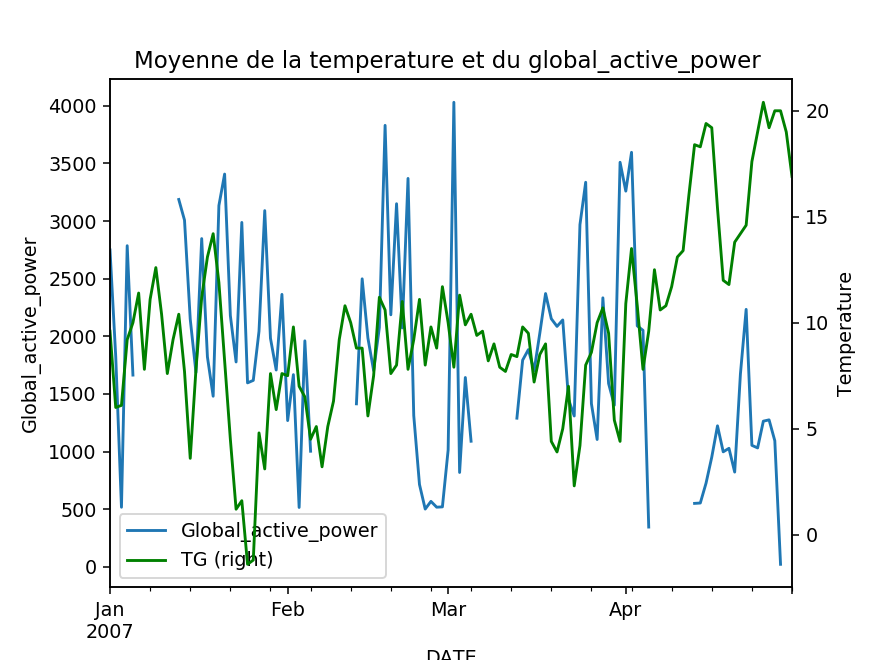

In [129]:
ax=day_trim.plot(title="Moyenne de la temperature et du global_active_power ")
df_temp_trim.plot(ax=ax, secondary_y=True, style='g')
ax.right_ax.set_ylabel('Temperature')
ax.set_ylabel('Global_active_power')
plt.xticks(rotation=60)
plt.show()

## Question 7 

### Chargement des donnees

In [144]:
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'airparifabae1bd78def4fe8a409ab8c95fc4608'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(os.path.isfile('zipfilename')):
    urllib.request.urlretrieve(Location, zipfilename)
    
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
#na_values = ['?', ''] 
fields = ['date', 'heure', 'NO2', 'O3']
df_pollution = pd.read_csv('20080421_20160927-PA13_auto.csv', sep=';', nrows=200000, na_values=['n/d'], usecols=fields,skiprows=[1])

In [145]:
df_pollution.head()

,date,heure,NO2,O3
0,21/04/2008,1,13.0,74.0
1,21/04/2008,2,11.0,73.0
2,21/04/2008,3,13.0,64.0
3,21/04/2008,4,23.0,46.0
4,21/04/2008,5,47.0,24.0


In [146]:
df_pollution.dropna(axis=0)
df_pollution_new=df_pollution

In [147]:
df_pollution_new['date']=pd.to_datetime(df_pollution_new['date'])
df_pollution_new = df_pollution_new.set_index(['date'])
df_pollution_group=df_pollution_new.groupby(pd.TimeGrouper(freq='A')).agg({'O3': np.mean})[['O3']]

In [148]:
df_pollution_group.head()

,O3
date,
2008-12-31,39.830797
2009-12-31,40.287643
2010-12-31,38.020582
2011-12-31,37.887899
2012-12-31,37.115905


<IPython.core.display.Javascript object>


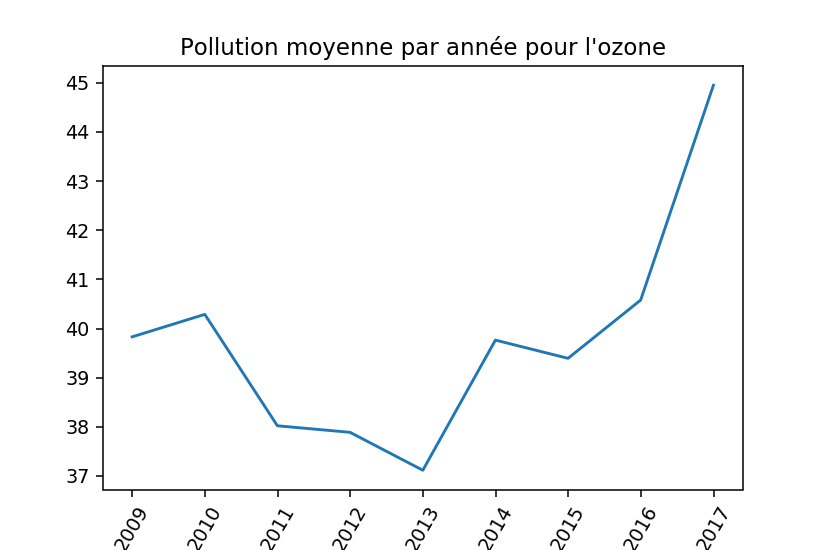

In [149]:
fig=plt.figure(figsize=(6,4))
plt.plot(df_pollution_group['O3'])
plt.xticks(rotation=60)
plt.title("Pollution moyenne par année pour l'ozone")
plt.show()


## Question 8 

### Visualisation de la pollution la plus critique par année pour l'ozone et pour pour le dioxyde d'azote. 

In [150]:
df_pollution_group_NO=df_pollution_new.groupby(pd.TimeGrouper(freq='A')).agg({'NO2': np.mean})[['NO2']]

In [151]:
df_pollution_group_NO.head()

,NO2
date,
2008-12-31,34.624102
2009-12-31,38.401470
2010-12-31,37.629090
2011-12-31,35.040826
2012-12-31,34.111086


<IPython.core.display.Javascript object>


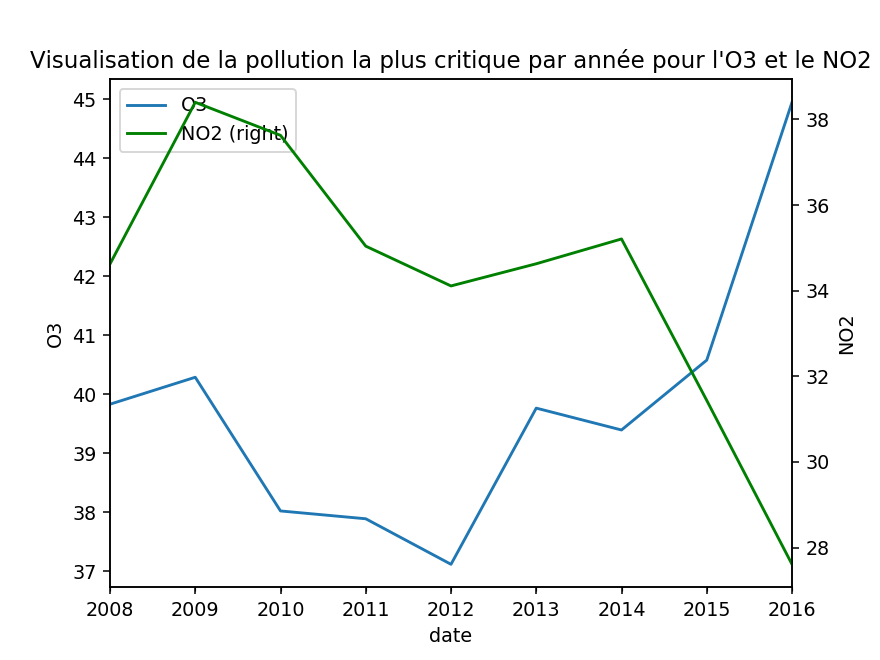

In [152]:
ax=df_pollution_group.plot(title="Visualisation de la pollution la plus critique par année pour l'O3 et le NO2")
df_pollution_group_NO.plot(ax=ax, secondary_y=True, style='g')
ax.right_ax.set_ylabel('NO2')
ax.set_ylabel('O3')
plt.xticks(rotation=60)
plt.show()

## Question 9

### Représentation de la pollution à l'ozone et au dioxyde d'azote par mois 

In [153]:
df_pollution_group_poll=df_pollution_new.groupby(pd.TimeGrouper(freq='M')).agg({'NO2': np.sum,'O3':np.sum})[['NO2','O3']]

In [154]:
df_pollution_group_poll['NO2']=df_pollution_group_poll['O3']-df_pollution_group_poll['NO2']
del df_pollution_group_poll['O3']
df_pollution_group_poll=df_pollution_group_poll.rename(columns={'NO2':'Pollution'})

In [155]:
df_pollution_group_poll.head()

,Pollution
date,
2008-01-31,3122.0
2008-02-29,-25.0
2008-03-31,391.0
2008-04-30,5892.0
2008-05-31,9722.0


<IPython.core.display.Javascript object>


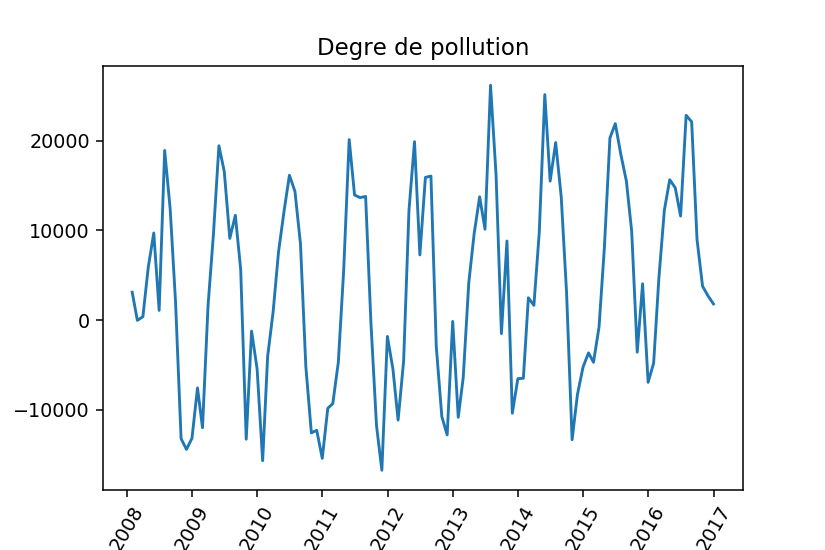

In [156]:
fig=plt.figure(figsize=(6,4))
plt.plot(df_pollution_group_poll['Pollution'])
plt.xticks(rotation=60)
plt.title("Degre de pollution")
plt.show()

In [157]:
print('Le mois le plus pollue est: Mai (la ou se trouvent les pics) ')

Le mois le plus pollue est: Mai (la ou se trouvent les pics) 
